# **1. Khai báo thư viện cần thiết.**

Khai báo các thư viện cần thiết để thực hiện:
* Tiền xử lý dữ liệu.
* Khai thac khám phá dữ liệu.
* Trực quan hóa dữ liệu.

In [1]:
import pandas as pd 
import io
import numpy as np
import urllib.robotparser

#Visuallize data
import seaborn as sns
from matplotlib import pyplot as plt

# **2. Tiền xử lý dữ liệu.**

## 2.1. Quan sát đặc điểm và thông tin dữ liệu.

Đọc dữ liệu và thay thế các trường chứa ký tự '[]' thành rỗng (vì lúc thu thập các trường này không có data nên xuất ra một mảng rỗng giá trị).  
Các file dữ liệu thu thập được từ các quận sẽ được thêm 1 trường thông tin là `location` chỉ tên quận và gộp lại thành 1 bảng data.

In [2]:
df=pd.DataFrame()
district=['quan-1','quan-2','quan-3','quan-4','quan-5','quan-6','quan-7','quan-8','quan-9','quan-10','quan-11','quan-12','quan-thu-duc','quan-binh-thanh','quan-binh-tan','quan-tan-binh','quan-go-vap','quan-phu-nhuan','quan-tan-phu']
code_district=len(district)

for d in district:
    fileName='Data/Crawl/'+d+('.csv')
    df_dt=pd.read_csv(fileName,index_col=0)
    df_dt=df_dt.replace('[]',np.nan)
    df_dt['location']=d
    df=pd.concat([df,df_dt])

In [3]:
df.head()

,title,address,project_name,apartment_code,block_name,block_code,square,square_area,square_in_use,bedroom,...,apartment_type,status,furniture_status,estate_status,apartment_specific,house_specific,_type,price_m2,price_square,location
0,MT TRẦN HƯNG ĐẠO . PHƯỜNG NGUYỄN CƯ TRINH . QU...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",NaN,NaN,NaN,NaN,NaN,78 m²,NaN,6 phòng,...,NaN,NaN,['Nội thất cao cấp'],NaN,NaN,"['Hẻm xe hơi', 'Nở hậu']",NaN,"282,05 triệu/m²",22 tỷ- 78 m2đ,quan-1
1,"Bán nhà chính chủ, hẻm xe hoi tới nhà","88/89, Nguyễn Van Quy, Phường Nguyễn Cư Trinh,...",NaN,NaN,NaN,NaN,NaN,81 m²,158 m²,3 phòng,...,NaN,NaN,NaN,NaN,NaN,['Hẻm xe hơi'],NaN,"60,49 triệu/m²","4,9 tỷ- 81 m2đ",quan-1
2,"Bán Nhà Nguyễn Trãi , 5 lầu 19P Thu Nhập 120tr/th","Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quậ...",NaN,NaN,NaN,NaN,NaN,125 m²,NaN,10 phòng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148 triệu/m²,"18,5 tỷ\nGIÁ TỐT\n- 125 m2đ",quan-1
3,Bán khách sạn mặt tiền đường NGUYỄN AN NINH P BẾN,"34, Đường Nguyễn An Ninh, Phường Bến Thành, Qu...",NaN,NaN,NaN,NaN,NaN,87 m²,473 m²,7 phòng,...,NaN,NaN,NaN,NaN,NaN,['Nở hậu'],NaN,"1,137931034 tỷ/m²",99 tỷ- 87 m2đ,quan-1
4,DO CHUYỂN NHÀ RA HÀ NỘI BÁN GẤP TRẦN ĐÌNH XU Q.1,"Đường Trần Đình Xu, Phường Cô Giang, Quận 1, T...",NaN,NaN,NaN,NaN,NaN,58 m²,58 m²,4 phòng,...,NaN,NaN,NaN,NaN,NaN,"['Hẻm xe hơi', 'Nở hậu']",NaN,"32,07 triệu/m²","1,86 tỷ- 58 m2đ",quan-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19468 entries, 0 to 54
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19419 non-null  object 
 1   address             19329 non-null  object 
 2   project_name        510 non-null    object 
 3   apartment_code      268 non-null    object 
 4   block_name          389 non-null    object 
 5   block_code          0 non-null      float64
 6   square              0 non-null      float64
 7   square_area         19411 non-null  object 
 8   square_in_use       13743 non-null  object 
 9   bedroom             19419 non-null  object 
 10  wc                  18150 non-null  object 
 11  num_floor           7412 non-null   object 
 12  floor               0 non-null      float64
 13  width               16195 non-null  object 
 14  height              16144 non-null  object 
 15  door                6618 non-null   object 
 16  balcony

In [5]:
df.to_csv('Data/Normalize/data.csv',index=False,encoding='utf-8')

Quan sát ta nhận thấy được, có 2 loại dữ liệu được thu thập trừ trang bất động sản:
* Mua bán nhà.
* Mua bán đất.  


Thể hiện ở việc 2 thuộc tính `square` và `square_are` khi thu thập nghĩa là diện tích và diện tích đất.  
Do đó, ta thực hiện tách ra làm 2 data frame về nhà và đất (vì những thuộc tính mua bán nhà có thể độc lập với mua bán đất nên ta không thể gom chung để phân tích vấn đề).

In [6]:
df_land=df[df['square_area'].isnull()==True]
df_house=df[df['square_area'].isnull()==False]

Xem lượng dữ liệu thông tin các data frame tương ứng.  

In [7]:
print('df_house: ',len(df_house))
print('df_land: ',len(df_land))

df_house:  19411
df_land:  57


***Nhận xét:***
- Ta thấy với dữ liệu về nhà ta thu được hơn 19,411 mẫu, đất chỉ có 57 mẫu.
- Đây là dữ liệu thô, chưa qua tiền xử lý (xóa trùng, lọc nhiễu).
- Vì thế có khả năng dữ liệu đất sẽ không có được nhiều dữ liệu tốt sau khi tiền xử lý vì thế ta chỉ xử lý và mô hình hóa dữ liệu về mua bán nhà.

In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19411 entries, 0 to 54
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19411 non-null  object 
 1   address             19321 non-null  object 
 2   project_name        509 non-null    object 
 3   apartment_code      268 non-null    object 
 4   block_name          389 non-null    object 
 5   block_code          0 non-null      float64
 6   square              0 non-null      float64
 7   square_area         19411 non-null  object 
 8   square_in_use       13742 non-null  object 
 9   bedroom             19411 non-null  object 
 10  wc                  18142 non-null  object 
 11  num_floor           7409 non-null   object 
 12  floor               0 non-null      float64
 13  width               16192 non-null  object 
 14  height              16140 non-null  object 
 15  door                6612 non-null   object 
 16  balcony

In [9]:
df_house.to_csv('Data/Normalize/data_house.csv',index=False,encoding='utf-8')

Quan sát thông tin tổng hợp ta có thể thấy thu thập được 31 trường thông tin trên dữ liệ (mô tả trên file README.md).
Có khá nhiều thông tin chứa dữ liệu rỗng.

In [10]:
row,col=df_house.shape
print('Tổng số thuộc tính thu thập được: ',col)
print('Tổng số mẫu thu thập được: ',row)

Tổng số thuộc tính thu thập được:  31
Tổng số mẫu thu thập được:  19411


Tước hết ta sẽ kiểm tra xem dữ liệu có bị trùng lắp hay không, và nếu có, số lượng trùng lắp là bao nhiêu?

In [11]:
num_duplicate=len(df_house[df_house.duplicated(keep='first')==True])
print('num_duplicate: ',num_duplicate)
print('ratio duplicate: {}%'.format(np.round(num_duplicate*100./len(df_house),1)))

num_duplicate:  875
ratio duplicate: 4.5%


Ta thấy có hơn 875 mẫu bị trùng lắp, chiếm khoảng 4.5% tổng dữ liệu.  
Ta sẽ xóa các dòng này đi và giữ lại dòng đầu tiên mỗi dữ liệu trùng lắp.

In [12]:
df_house=df_house.drop_duplicates(ignore_index=True,keep='first')

Ta sẽ tính toán tỷ lệ rỗng của các thuộc tính để xem xét và xử lý.

In [13]:
missing_ratio=[]
for name in df_house.columns:
    sum_null=df_house[name].isnull().sum()
    null_ratio=np.round(sum_null*100./len(df_house),1)
    
    missing_ratio.append(null_ratio)

missing_table=pd.Series(data=missing_ratio,index=df_house.columns)
missing_table

title                   0.0
address                 0.5
project_name           97.3
apartment_code         98.6
block_name             97.9
block_code            100.0
square                100.0
square_area             0.0
square_in_use          30.0
bedroom                 0.0
wc                      6.8
num_floor              62.0
floor                 100.0
width                  17.3
height                 17.6
door                   67.5
balcony               100.0
certificates           16.3
house_type              0.0
estate_type           100.0
office_type           100.0
apartment_type        100.0
status                100.0
furniture_status       69.1
estate_status         100.0
apartment_specific    100.0
house_specific         48.5
_type                  99.1
price_m2                0.0
price_square            0.0
location                0.0
dtype: float64

Với những thuộc tính có tỷ lệ gía trị thiếu quá 80% ta thấy sẽ không mang lại giá trị nhiều.  
Xóa các cột này đi.

In [14]:
for name in df_house.columns:
    if missing_table[name]>80.0:
        df_house=df_house.drop(name,axis=1)

Quan sát lại thông tin sau khi xóa trùng lắp và thuộc tính không mang nhiều ý nghĩa.

In [15]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             18536 non-null  object
 1   address           18449 non-null  object
 2   square_area       18536 non-null  object
 3   square_in_use     12966 non-null  object
 4   bedroom           18536 non-null  object
 5   wc                17270 non-null  object
 6   num_floor         7042 non-null   object
 7   width             15321 non-null  object
 8   height            15269 non-null  object
 9   door              6033 non-null   object
 10  certificates      15510 non-null  object
 11  house_type        18535 non-null  object
 12  furniture_status  5728 non-null   object
 13  house_specific    9537 non-null   object
 14  price_m2          18535 non-null  object
 15  price_square      18536 non-null  object
 16  location          18536 non-null  object
dtypes: object(17

***Nhận xét:***
- Sau khi thực hiện xóa trùng lắp ta giữa lại được 18,536 dòng dữ liệu.
- Với các thuộc tính trên 80% giá trị là rỗng, ta thực hiện loại bỏ và từ 31 thuộc tính thu thập ta giữ lại được 17 thuộc tính.

## 2.2. Chuẩn hóa thuộc tính dữ liệu.

### *2.2.1. Thuộc tính mang giá trị số.*

Với những thuộc tính về số như:
- `square_are`: Diện tích đất.
- `square_in_use`: Diện tích sử dụng.
- `bedroom`: Số phòng ngủ.
- `wc`: Số phòng vệ sinh.
- `width`: Chiều rộng.
- `height`: Chiều dài.
- `price_m2`: Giá bán trên 1 m2.  
- `price_square`: Giá bán nhà.

Ta cần thực hiện chuẩn hóa về đúng kiểu số (float).

Với các trường dữ liệu về `square_are`,`square_in_use`,`num_floor`,`width` và `height`, ta chuẩn hóa bằng cách tách trường số và trường chữ ra, lấy trường số là ép kiểu về dạng float.

- Ví dụ: `width`: '2 m'. Thực hiện split chuỗi theo khoảng trắng thu được mảng ['2','m']. Ta lấy gía trị đầu tiên của mảng và cuối dùng ép kiểu của thuộc tính từ objcet về số.

In [16]:
def object2num(df,col_name):
    len_col=len(df)
    for i in range(len_col):
        row=df[col_name][i]
        if row!=np.nan:
            data_list=str(row).split(' ')
            df.loc[i,col_name]=data_list[0]
    
    df[col_name]=df[col_name].astype(float)
    return df

In [17]:
num_col=['square_area','square_in_use','width','height']
for name in num_col:
    df_house=object2num(df_house,name)

Với `bedroom` và `wc` ta cũng thực hiện tương tự. Tuy nhiên 2 thuộc tính này còn 1 giá trị khác là *'Nhiều hơn ... phòng'*. Do đó ta xử lý 2 thuộc tính này riêng.  
Vẫn dùng split chuỗi theo khoảng trắng. Thực hiện kiểm tra độ dài mảng thu được:
- Nếu len==2: mảng thu được có cấu trúc tương tự như ở bước trên. Thực hiện tương tự.
- Nếu len>2: mảng thu được có dạng *'Nhiều hơn ... phòng'*, trích xuất giá trị ở vị trí thứ 3 của mảng.

In [18]:
def object2num_room(df,col_name):
    len_col=len(df)
    for i in range(len_col):
        row=df[col_name][i]
        if row!=np.nan:
            data_list=str(row).split(' ')
            if len(data_list)>2:
                df.loc[i,col_name]=int(data_list[2])+1
            else:
                df.loc[i,col_name]=data_list[0]
    
    df[col_name]=df[col_name].astype(float)
    return df

In [19]:
col_room=['bedroom','wc','num_floor']
for name in col_room:
    df_house=object2num_room(df_house,name)

Với thuộc tính số cuối cùng là `price_m2`, ta thực hiện chuẩn hóa bằng các bước:
- Split theo khoảng trắng để tách trường số là trường đơn vị.
- Chuẩn hóa trường số dạng abc,cde hoặc abc.cde thành abccde, ép kiểu về dạng số.
- Kiểm tra trong trường đơn vị:
    - Nếu đơn vị triệu: trường số * $10^6$.
    - Nếu đơn vị tỷ: trường số * $10^9$.
    - Nếu đơn vị đồng, giữ nguyên.

In [20]:
for i in range(len(df_house)):
    row=df_house['price_m2'][i]
    if str(row)!='nan':
        data_list=str(row).split(' ')
        dt=0
        if data_list[1].find('triệu')!=-1:
            dt=float(data_list[0].replace(',',''))*(10**6)
        elif data_list[1].find('tỷ')!=-1:
            dt=float(data_list[0].replace(',',''))*(10**9)
        else:
            dt=float(data_list[0].replace('.',''))
        df_house.loc[i,'price_m2']=dt
        
        
df_house['price_m2']=df_house['price_m2'].astype(float)

Thực hiện tương tự cho giá nhà tổng `price_square`, tuy nhiên lần này ta sẽ thực hiện tách trường giá nhà tổng ra trước bằng cách split chuỗi theo  kí tự '-'

In [21]:
for i in range(len(df_house)):
    if str(df_house['price_square'][i])!='nan':
        row=str(df_house['price_square'][i]).split('-')[0]    
        data_list=str(row).split(' ')
        dt=0
        if len(data_list)>1:
            if data_list[1].find('triệu')!=-1:
                dt=float(data_list[0].replace(',',''))*(10**6)
            elif data_list[1].find('tỷ')!=-1:
                dt=float(data_list[0].replace(',',''))*(10**9)
            else:
                dt=float(data_list[0].replace('.',''))
            df_house.loc[i,'price_square']=dt
        else:
            df_house.loc[i,'price_square']=np.nan
            
df_house['price_square']=df_house['price_square'].astype(float)

### *2.2.2. Thuộc tính Object.*

Đối với thuộc tính object, ta sẽ thực hiện chuẩn hóa lại các chuỗi giá trị bằng cách xóa đi các dấu mảng (`[` hoặc `]`) còn tồn tại trong quá trình thu thập và lấy dữ liệu.

In [22]:
object_col=['door','certificates','house_type','furniture_status','house_specific']

In [23]:
for name in object_col:
    for i in range(len(df_house[name])):
        if str(df_house[name][i])!='nan':
            df_house.loc[i,name]=str(df_house[name][i]).replace('[','')
            df_house.loc[i,name]=str(df_house[name][i]).replace(']','')
            df_house.loc[i,name]=str(df_house[name][i]).replace("'",'')

Xem lại kiểu dữ liệu các thuộc tính sau khi chuẩn hóa đã phù hợp.

In [24]:
df_house.dtypes

title                object
address              object
square_area         float64
square_in_use       float64
bedroom             float64
wc                  float64
num_floor           float64
width               float64
height              float64
door                 object
certificates         object
house_type           object
furniture_status     object
house_specific       object
price_m2            float64
price_square        float64
location             object
dtype: object

## 2.3. Xử lý missing value.

Ta sẽ thực hiện xử lý một vài trường thông tin bị thiếu giá trị.  
Mỗi thuộc tính sẽ dựa trên quan sát có được đưa ra cách xử lý hợp lý.  
Ta xem các thuộc tính nào tồn tại giá trị thiếu và kiểu dữ liệu của chúng.

In [25]:
mis=[]
for name in df_house.columns:
    if df_house[name].isnull().sum()>0:
        mis.append(name)
        
df_house[mis].dtypes

address              object
square_in_use       float64
wc                  float64
num_floor           float64
width               float64
height              float64
door                 object
certificates         object
house_type           object
furniture_status     object
house_specific       object
price_m2            float64
price_square        float64
dtype: object

Thuộc tính quan tâm đầu tiên là `square_in_use`. Diện tích sử dụng được tính toán dựa trên diện tích sàn nhà được xây dựng, do đó, ở những cột rỗng nếu ta điền giá trị là mean hay median sẽ không hợp lý thay vì ta sẽ thay thế bằng chính diện tích đất `square_are`.

In [26]:
for i in range(len(df_house)):
    s_use=df_house['square_in_use'][i]
    if str(s_use)=='nan':
        df_house.loc[i,'square_in_use']=df_house['square_area'][i]

Tiếp theo ta sẽ điền rỗng cho thuộc tính `num_floor`, với những dòng mà `num_floor` rỗng, ta sẽ tính toán dựa trên `square_in_use`/`square` và làm tròn. Việc tính toán như vậy sẽ cảm giác hợp lý hơn (trường hợp diện tích sử dụng lớn hơn diện tích đất, nghĩa là nhà có xây tầng lên và do đó sẽ tính được số tầng dự đoán).

In [27]:
for i in range(len(df_house)):
    if str(df_house['num_floor'][i])=='nan':
        num_floor=int(float(df_house['square_in_use'][i])/float(df_house['square_area'][i]))
        if num_floor>0:
            df_house.loc[i,'num_floor']=num_floor
        else:
            df_house.loc[i,'num_floor']=1

df_house['num_floor']=df_house['num_floor'].astype(int)

Đối với các giá trị rỗng của `wc`, ta không có cơ sở để tính toán nên ta sẽ đặt giá trị rỗng bằng giá trị median của thuộc tính tương ứng.

In [28]:
median_wc=df_house['wc'].median()
df_house['wc']=df_house['wc'].fillna(median_wc)

In [29]:
df_house['bedroom']=df_house['bedroom'].astype(int)
df_house['wc']=df_house['wc'].astype(int)

Thuộc tính `width` và `height`, thực hiện điền rỗng theo phương pháp:
- Nếu cả 2 thuộc tính tại 1 dòng đều rỗng, ta sẽ lấy giá trị `square_are` tại đó lấy căn bậc 2 (xem như mảnh đất hình vuông).
- Nếu 1 trong 2 thuộc tính rỗng, tính gía trị thuộc tính rỗng bằng `square_are` chia cho thuộc tính có giá trị còn lại.

In [30]:
for i in range(len(df_house)):
    w=df_house['width'][i]
    h=df_house['height'][i]
    
    s=df_house['square_area'][i]
    
    if str(w)=='nan' and str(h)=='nan':
        dt=np.round(np.sqrt(s),1)
        df_house.loc[i,'width']=dt
        df_house.loc[i,'height']=dt
    elif str(w)=='nan' and str(h)!='nan':
        dt=np.round(s/float(h),1)
        df_house.loc[i,'width']=dt
    elif str(w)!='nan' and str(h)=='nan':
        dt=np.round(s/float(w),1)
        df_house.loc[i,'height']=dt

Với các loại giấy tờ từ `certificates`, ta sẽ điền rỗng bằng giá tạo mới, đó chính là không có giấy tờ (xem những trường rỗng là những nhà chưa có được giấy tờ pháp lý.)

In [31]:
most_cert='Không có giấy tờ'
df_house['certificates']=df_house['certificates'].fillna(most_cert)

Tạo thuộc tính mới cho các cột quá nhiều giá trị thiếu.

In [32]:
fill_nan=df_house['house_specific'].mode()[0]
df_house['furniture_status']=df_house['furniture_status'].fillna('Bàn giao thô')
df_house['house_specific']=df_house['house_specific'].fillna(fill_nan)

Xem lại thông tin các thuộc tính sau khi điền giá trị rỗng.

In [33]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             18536 non-null  object 
 1   address           18449 non-null  object 
 2   square_area       18536 non-null  float64
 3   square_in_use     18536 non-null  float64
 4   bedroom           18536 non-null  int64  
 5   wc                18536 non-null  int64  
 6   num_floor         18536 non-null  int64  
 7   width             18536 non-null  float64
 8   height            18536 non-null  float64
 9   door              6033 non-null   object 
 10  certificates      18536 non-null  object 
 11  house_type        18535 non-null  object 
 12  furniture_status  18536 non-null  object 
 13  house_specific    18536 non-null  object 
 14  price_m2          18535 non-null  float64
 15  price_square      18535 non-null  float64
 16  location          18536 non-null  object

Xem lại phân bố một số thuộc tính dữ liệu trước khi tiến hành cho các bước kế tiếp.

Text(0.5, 1.0, 'Num floor')

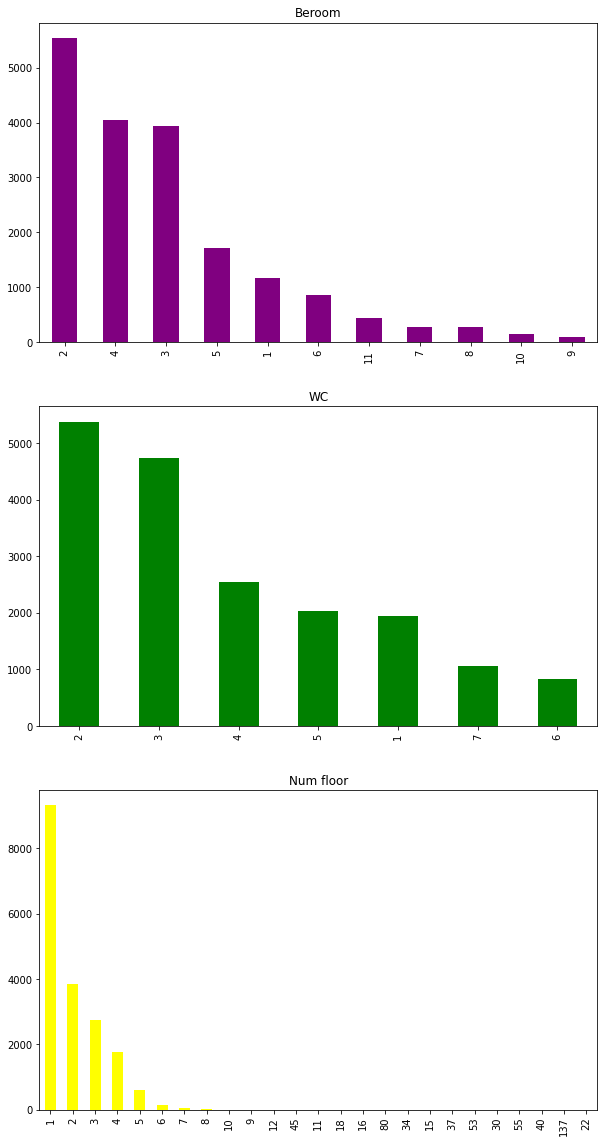

In [34]:
fig, (ax1, ax2,ax3) = plt.subplots(3)
df_house['bedroom'].value_counts().plot.bar(color='purple',ax=ax1,figsize=(10,20))
ax1.set_title('Beroom')

df_house['wc'].value_counts().plot.bar(color='green',ax=ax2)
ax2.set_title('WC')

df_house['num_floor'].value_counts().plot.bar(color='yellow',ax=ax3)
ax3.set_title('Num floor')#

_Giá trị các thuộc tính về số phòng ngủ và số phòng vệ sinh chênh lệch khá nhiều, ta có thể thấy phần lớp tập trung ở các giá trị 2,3 và 4.  
_Giá trị về số tầng nhà `num_floor` cũng tương tự, tuy nhiên ta thấy có tồn tại nhiễu (nhà có 137 tầng ở TP.HCM ???)  
_Để việc các giá trị lệch này cũng như khử nhiễu, cách đơn giản nhất sẽ thực hiện ở những bước kế tiếp là chia giỏ (Bining).

Text(0.5, 1.0, 'Price')

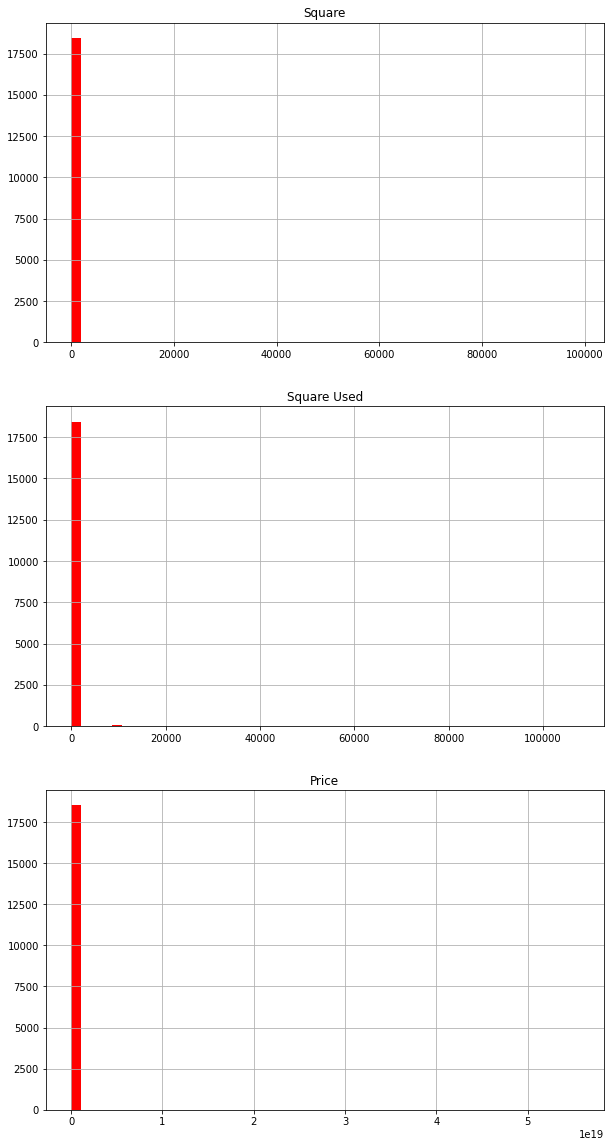

In [36]:
fig, (ax1, ax2,ax3) = plt.subplots(3)
df_house['square_area'].hist(ax=ax1,figsize=(10,20),color='red',bins=50)
ax1.set_title('Square')

df_house['square_in_use'].hist(ax=ax2,bins=50,color='red')
ax2.set_title('Square Used')

df_house['price_square'].hist(ax=ax3,bins=50,color='red')
ax3.set_title('Price')

Quan sát trên một vài thuộc tính liên tục khác (`price_square`,`square_area` và `square_in_use`), sự tồn đọng chênh lệch gía trị vẫn có và dường như lệch hẳn về 1 phía, các giá trị lớn tồn tại rất ít là rất xa so với những giá trị tập trung nhiều.

<AxesSubplot:>

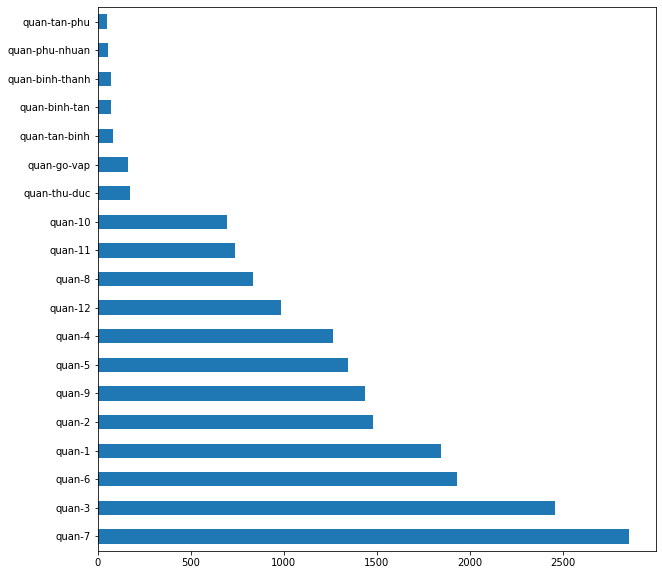

In [37]:
plt.figure(figsize=(10,10))
df_house['location'].value_counts().plot.barh()

Với `location`, sự chênh lệch thể hiện cũng rất rõ khi phần lớp dữ liệu nằm ở các quận 1,3,5,7 (đa phần là các quận trung tâm), các quận mang số hiệu chữ ít dữ liệu hơn.

Đối với các giá trị về diện tích và giá, ta thấy cũng có sự chêch lệch và nhiễu hiện ra, có những giá trị tồn tại rất lớn (ngàn tỷ)!!!.  
Ta nhận thấy việc rời rạc hóa dữ liệu để dữ liệu được cân bằng hơn và loại bớt đi những điểm nhiễu là điều cần thiết.

## 2.4. Rời rạc hóa dữ liệu liên tục.

Thực hiện rời rạc hóa các thuộc tính số liên tục. Việc rời rạc hóa dữ liệu sẽ giúp cho mô hình đạt được:
- Tránh overfitting.
- Loại bỏ được nhiễu.

Rời rạc hóa dữ liệu bằng phương pháp Binning (cụ thể là Width-Binning) với các giỏ như sau:
- `price_m2`,`price_square`: 5.
- `square_area`,`square_in_use`: 4.
- `bedroom`,`wc`,`width`,`height`: 3.
- `num_floor`: 2.

In [38]:
df_house['price_m2']=pd.qcut(df_house['price_m2'],5,labels=[0,1,2,3,4])
df_house['price_square']=pd.qcut(df_house['price_square'],5,labels=[0,1,2,3,4])
df_house['width']=pd.qcut(df_house['width'],3,labels=[0,1,2])
df_house['height']=pd.qcut(df_house['height'],3,labels=[0,1,2])
df_house['square_area']=pd.qcut(df_house['square_area'],4,labels=[0,1,2,3])
df_house['square_in_use']=pd.qcut(df_house['square_in_use'],4,labels=[0,1,2,3])
df_house['bedroom']=pd.qcut(df_house['bedroom'],3,labels=[0,1,2])
df_house['wc']=pd.qcut(df_house['wc'],3,labels=[0,1,2])

Với thuộc tính `num_floor`, giờ ta sẽ chia làm 2 giỏ với điều kiện xem như nhà có tầng (đánh số là 1) và nhà không tầng (đánh số là 0).

In [39]:
for i in range(len(df_house)):
    if df_house['num_floor'][i]<2:
        df_house.loc[i,'num_floor']=0
    else:
        df_house.loc[i,'num_floor']=1

## 2.5. Gán nhãn dữ liệu phi số.

In [40]:
cert=df_house['certificates'].unique()
house_type=df_house['house_type'].unique()
district=df_house['location'].unique()
furiture=df_house['furniture_status'].unique()
specific=df_house['house_specific'].unique()

In [41]:
print('Certificates values: {}\nTotal: {}'.format(cert,len(cert)))

Certificates values: ['Đã có sổ' 'Không có giấy tờ' 'Giấy tờ khác' 'Đang chờ sổ']
Total: 4


Thực hiện gán nhãn dữ liệu cho thuộc tính định danh. Với `certificates` ta sẽ gán làm 3 nhãn. (0,1,2)

In [42]:
for i in range(len(df_house['certificates'])):
    if df_house['certificates'][i]=='Đã có sổ':
        df_house.loc[i,'certificates']=0
    elif df_house['certificates'][i]=='Đang chờ sổ':
        df_house.loc[i,'certificates']=1
    elif df_house['certificates'][i]=='Giấy tờ khác':
        df_house.loc[i,'certificates']=1
    else:
        df_house.loc[i,'certificates']=3

In [43]:
print('House type values: {}\nTotal: {}'.format(house_type,len(house_type)))

House type values: ['Nhà mặt phố, mặt tiền' 'Nhà ngõ, hẻm' 'Nhà phố liền kề' 'Nhà biệt thự'
 nan]
Total: 5


Tương tự cho thuộc tính `house_type`, ta sẽ gán làm 4 nhãn (0,1,2,3)

In [44]:
for i in range(len(df_house['house_type'])):
    if df_house['house_type'][i]=='Nhà phố liền kề':
        df_house.loc[i,'house_type']=0
    elif df_house['house_type'][i]=='Nhà mặt phố, mặt tiền':
        df_house.loc[i,'house_type']=1
    elif df_house['house_type'][i]=='Nhà ngõ, hẻm':
        df_house.loc[i,'house_type']=2
    else:
        df_house.loc[i,'house_type']=3

Với vị trí quận `location` ta sẽ có 19 nhãn thuộc 19 quận khác nhau (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)

In [45]:
print('District location values: {}\nTotal: {}'.format(district,len(district)))

District location values: ['quan-1' 'quan-2' 'quan-3' 'quan-4' 'quan-5' 'quan-6' 'quan-7' 'quan-8'
 'quan-9' 'quan-10' 'quan-11' 'quan-12' 'quan-thu-duc' 'quan-binh-thanh'
 'quan-binh-tan' 'quan-tan-binh' 'quan-go-vap' 'quan-phu-nhuan'
 'quan-tan-phu']
Total: 19


Ta sẽ tạo thêm 1 cột dữ liệu mới `in_centroid` sẽ đánh dấu là `1` đối với các quận thuộc khu vực trung tâm thành phố (1,3,4,5,6,8,10,11,Tân Phú, Tân Bình, Gò Vấp, Phú Nhuận, Bình Thạnh) và `0` đối với các quận còn lại.

In [46]:
center=['quan-1','quan-3','quan-4','quan-5','quan-6','quan-8','quan-10','quan-11','quan-tan-phu','quan-tan-binh','quan-go-vap','quan-phu-nhuan','quan-binh-thanh']
df_house['in_centroid']=0
for i in range(len(df_house)):
    di=str(df_house['location'][i])
    if di in center:
        df_house.loc[i,'in_centroid']=1

In [47]:
for i in range(len(df_house)):
    di=str(df_house['location'][i])
    code=list(district).index(di)
    
    df_house.loc[i,'location']=code

Gán nhãn cho thuộc tính về nội thất `furniture_status`

In [48]:
print('Furnture status values: {}\nTotal: {}'.format(furiture,len(furiture)))

Furnture status values: ['Nội thất cao cấp' 'Bàn giao thô' 'Hoàn thiện cơ bản' 'Nội thất đầy đủ']
Total: 4


In [49]:
for i in range(len(df_house['furniture_status'])):
    if df_house['furniture_status'][i]=='Nội thất cao cấp':
        df_house.loc[i,'furniture_status']=0
    elif df_house['furniture_status'][i]=='Nội thất đầy đủ':
        df_house.loc[i,'furniture_status']=1
    elif df_house['furniture_status'][i]=='Hoàn thiện cơ bản':
        df_house.loc[i,'furniture_status']=2
    else:
        df_house.loc[i,'furniture_status']=3

In [50]:
print('Furnture status values: {}\nTotal: {}'.format(specific,len(specific)))

Furnture status values: ['Hẻm xe hơi, Nở hậu' 'Hẻm xe hơi' 'Nở hậu']
Total: 3


Gán nhãn cho thuộc tính `house_specific`

In [51]:
for i in range(len(df_house['house_specific'])):
    if df_house['house_specific'][i]=='Hẻm xe hơi, Nở hậu':
        df_house.loc[i,'house_specific']=0
    elif df_house['house_specific'][i]=='Hẻm xe hơi':
        df_house.loc[i,'house_specific']=1
    elif df_house['house_specific'][i]=='Nở hậu':
        df_house.loc[i,'house_specific']=2
    else:
        df_house.loc[i,'house_specific']=3

In [52]:
df_house=df_house.dropna(subset=['price_square'])

In [53]:
col=['certificates','furniture_status','location','price_m2','price_square','square_area','square_in_use','bedroom','house_specific','width','height','wc','house_type']
for c in col:
    df_house[c]=df_house[c].astype(int)

In [54]:
df_house.head()

,title,address,square_area,square_in_use,bedroom,wc,num_floor,width,height,door,certificates,house_type,furniture_status,house_specific,price_m2,price_square,location,in_centroid
0,MT TRẦN HƯNG ĐẠO . PHƯỜNG NGUYỄN CƯ TRINH . QU...,"Đường Trần Hưng Đạo, Phường Nguyễn Cư Trinh, Q...",2,1,2,2,1,0,2,NaN,0,1,0,0,4,1,0,1
1,"Bán nhà chính chủ, hẻm xe hoi tới nhà","88/89, Nguyễn Van Quy, Phường Nguyễn Cư Trinh,...",2,2,1,1,0,0,2,Tây Nam,0,1,3,1,2,1,0,1
2,"Bán Nhà Nguyễn Trãi , 5 lầu 19P Thu Nhập 120tr/th","Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quậ...",3,2,2,2,1,2,1,NaN,0,2,3,1,0,4,0,1
3,Bán khách sạn mặt tiền đường NGUYỄN AN NINH P BẾN,"34, Đường Nguyễn An Ninh, Phường Bến Thành, Qu...",3,3,2,2,1,0,2,NaN,0,1,3,2,4,3,0,1
4,DO CHUYỂN NHÀ RA HÀ NỘI BÁN GẤP TRẦN ĐÌNH XU Q.1,"Đường Trần Đình Xu, Phường Cô Giang, Quận 1, T...",1,1,1,1,0,1,1,NaN,0,2,3,0,1,4,0,1


In [55]:
df_house.to_csv('Data/Preprocessing/preprocessing_data.csv',index=False,encoding='utf-8')

# **3. Trực quan hóa dữ liệu.**

## 3.1. Xem độ tương quan giữa 2 biến dữ liệu trong bảng.

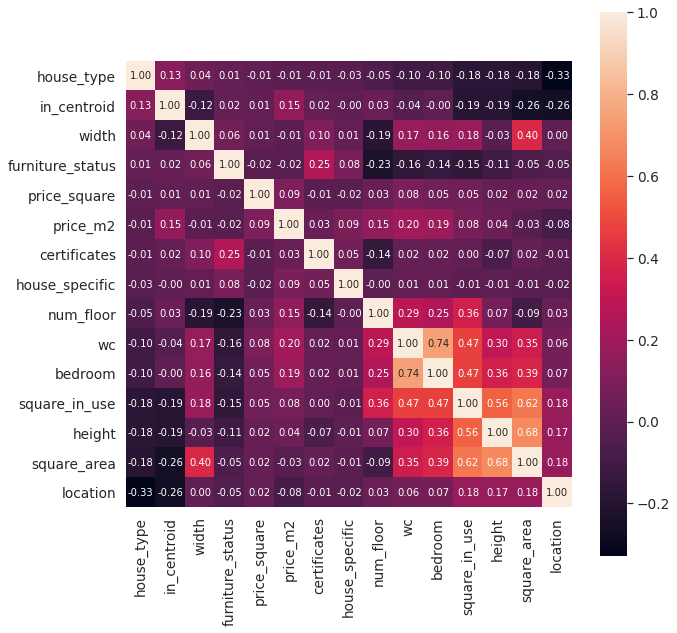

In [56]:
k = 15
corrmat = df_house.corr()
cols = corrmat.nlargest(k, 'house_type')['house_type'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

***Nhận xét:***
- Ta thấy các lớp của chúng ta chỉ có thuộc tính được xem là tương quan yếu (trị số dương), còn lại các thuộc tính đều gần như rất khác biệt.
- 3 thuộc tính đang có tương quan với lớp cần phân loại là: `width`, `in_centroid` và `furniture_status`.

Vậy bây giờ ta sẽ cùng quan sát các thuộc tính còn lại vì sao lại rất cách biệt với thuộc tính lớp như vậy.

## 3.2. Phân bố, thống kê giá trị dữ liệu

Ta sẽ xem số lượng giá trị của thuộc tính phân lớp `house_type`.

<AxesSubplot:>

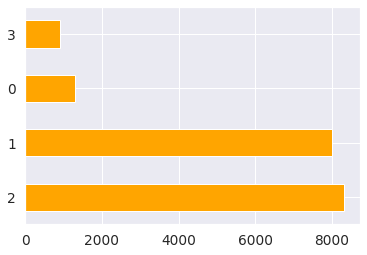

In [57]:
house_type=df_house['house_type'].value_counts()
house_type.plot.barh(color='orange')

_Rõ ràng ta nhận thấy, trong quá trình thu thập dữ liệu, số mẫu của các lớp cũng có sự chênh lệch rất nhiều.  
_Đây không phải là 1 dấu hiệu tốt vì khả năng những lớp ít mẫu mô hình sẽ khó thể tổng quát hóa được, và quá trình kiểm thử sẽ không ra kết quả tốt.  
_Vậy ta sẽ tiến hành một kỹ thuật nho nhỏ để cải thiện việc này: ***Up-sampling***

Tiếp theo ta sẽ xem lại phân bố các thuộc tính khác để xem sau khi rời rạc hóa, dữ liệu đã cân bằng tốt hơn chưa.

Text(0.5, 1.0, 'Num floor')

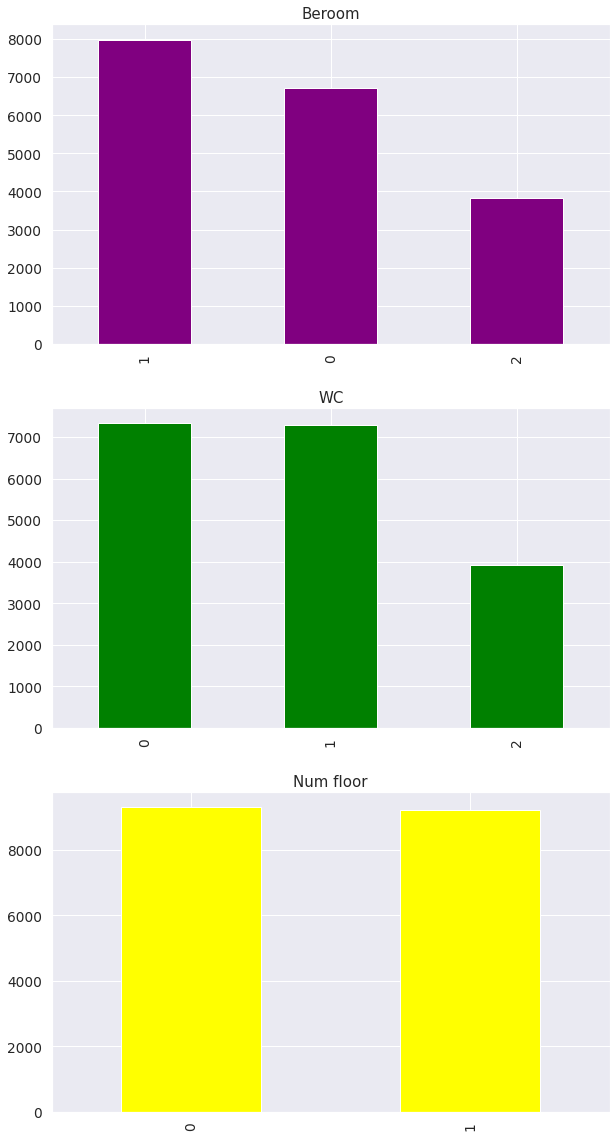

In [58]:
fig, (ax1, ax2,ax3) = plt.subplots(3)
df_house['bedroom'].value_counts().plot.bar(color='purple',ax=ax1,figsize=(10,20))
ax1.set_title('Beroom')

df_house['wc'].value_counts().plot.bar(color='green',ax=ax2)
ax2.set_title('WC')

df_house['num_floor'].value_counts().plot.bar(color='yellow',ax=ax3)
ax3.set_title('Num floor')#

Đầu tiên với 3 thuộc tính `bedroom`,`wc` và `num_floor`: Ta dễ nhận thấy sau khi rời rạc hóa, `bedroom` và `wc` phân bố ổn hơn, vẫn còn chênh lệch nhưng không đến mức lệch quá xa như ban đầu. Riêng thuộc tính `num_floor` đã trở nên cân bằng hơn rất nhiều, do việc phân chia các loại nhà không tầng và có tầng đã làm giảm sự chênh lệch này (vì phần lớn dữ liệu tập trung ở tầng 1 và 2)

Text(0.5, 1.0, 'In centroid?')

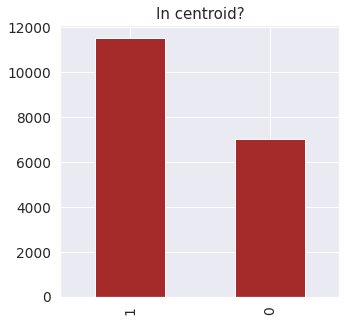

In [59]:
plt.figure(figsize=(5,5))
df_house['in_centroid'].value_counts().plot.bar(color='brown')
plt.title('In centroid?')

Tuy nhiên khi ta xét trên diện thuộc khu vực trung tâm thành phố hay không thì dữ liệu sau phân bố đã có vẻ ổn hơn: không còn phân rã nhiều, còn chêch lệch nhưng không quá xa.

Text(0.5, 1.0, 'Price')

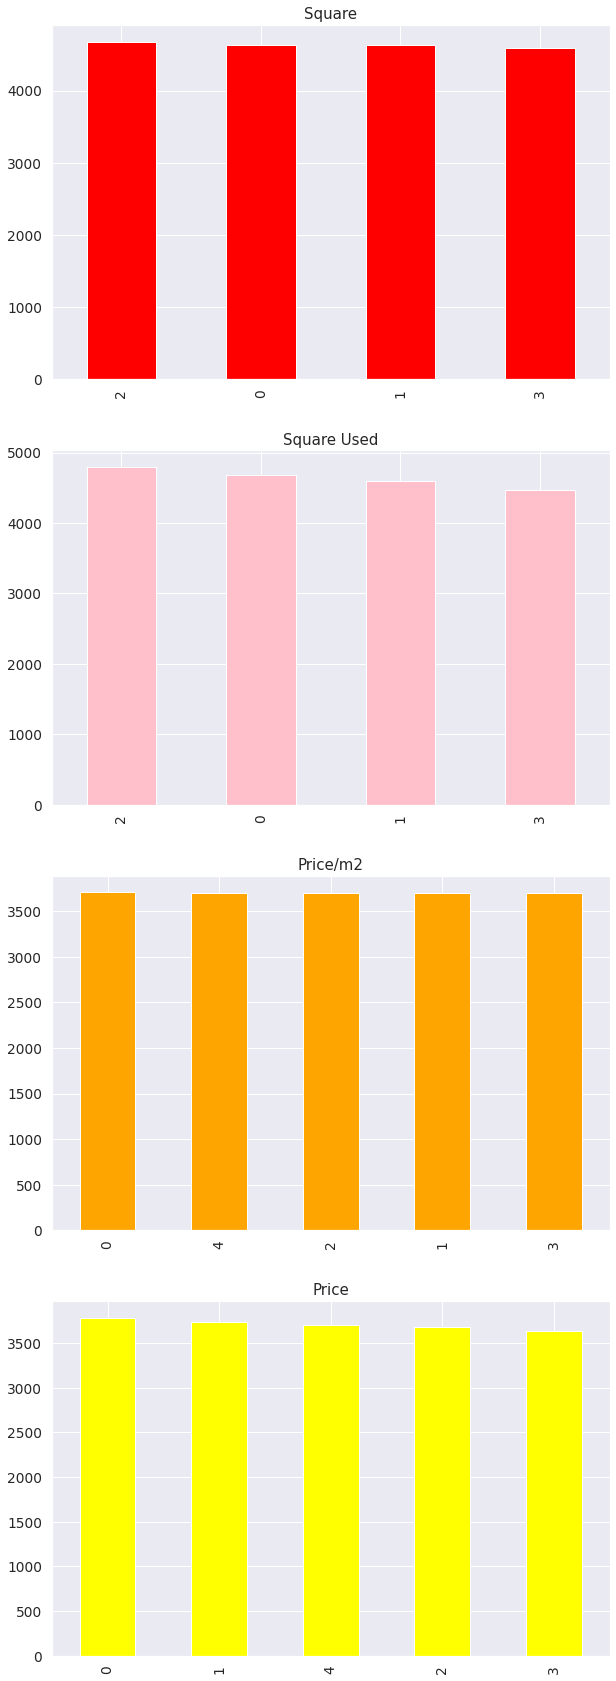

In [60]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4)
df_house['square_area'].value_counts().plot.bar(color='red',ax=ax1,figsize=(10,30))
ax1.set_title('Square')

df_house['square_in_use'].value_counts().plot.bar(color='pink',ax=ax2)
ax2.set_title('Square Used')

df_house['price_m2'].value_counts().plot.bar(color='orange',ax=ax3)
ax3.set_title('Price/m2')

df_house['price_square'].value_counts().plot.bar(color='yellow',ax=ax4)
ax4.set_title('Price')

Về các thuộc tính liên tục như `square_area`, `square_in_use`, `price_m2`, `price_square`, một thông tin khá tốt khi các gia strij này sau khi thực hiện rời rạc phân bố đều khá cân bằng và không bị lệch nhau quá nhiều.

<AxesSubplot:ylabel='certificates'>

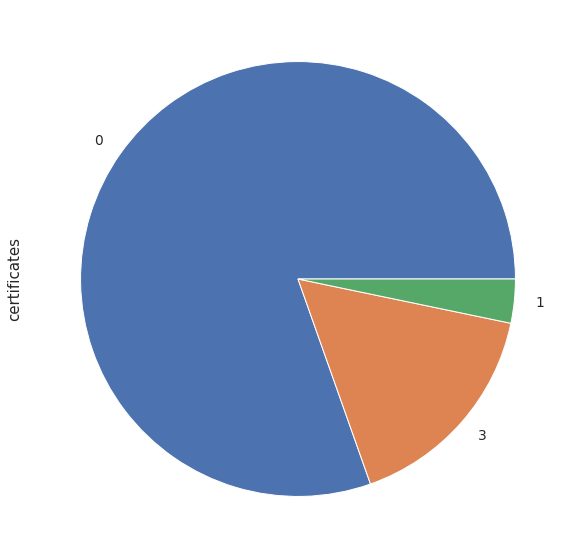

In [61]:
plt.figure(figsize=(10,10))
df_house['certificates'].value_counts().plot.pie()

<AxesSubplot:ylabel='furniture_status'>

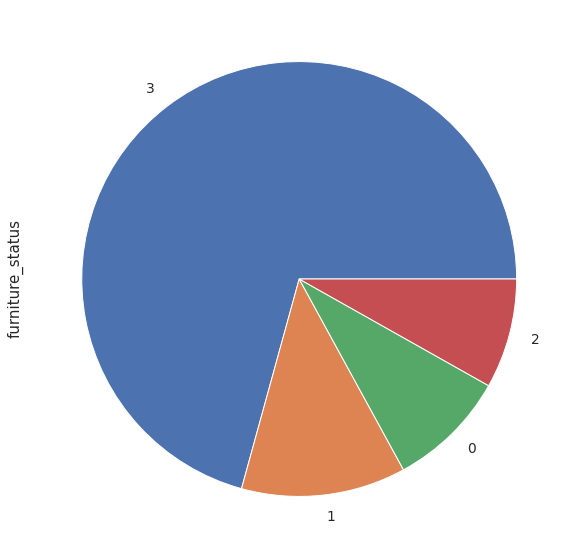

In [62]:
plt.figure(figsize=(10,10))
df_house['furniture_status'].value_counts().plot.pie()

<AxesSubplot:ylabel='house_specific'>

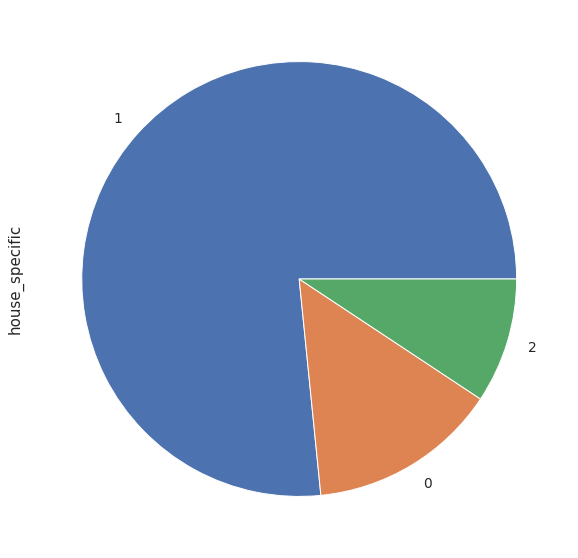

In [63]:
plt.figure(figsize=(10,10))
df_house['house_specific'].value_counts().plot.pie()

Với những thuộc tính category (`certificates`,`house_specific`,`furrniture_status`) cũng tồn tại sự chênh lệc về dữ liệu các lớp, từ đó ta thấy độ tương quan các thuộc tính này với thuộc tính dự đoán khá cách biệt. 